In [2]:
import numpy as np
import pandas as pd
train = pd.read_csv('/Users/matthewvitha/Downloads/mnist_train.csv')
new_column_name = ['label']
for num in range(train.shape[1]-1):
    tem = 'pixel' + str(num)
    new_column_name.append(tem)

train.columns = new_column_name

In [3]:
print(train.shape)
train.head()

(59999, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_result = train["label"]  # dependent variable
train_predictors = train.drop(["label"], axis = 1)

In [5]:
test = pd.read_csv('/Users/matthewvitha/Downloads/mnist_test.csv')
new_column_name = ['label']
for num in range(test.shape[1]-1):
    tem = 'pixel' + str(num)
    new_column_name.append(tem)

test.columns = new_column_name

In [6]:
print(test.shape)
train.head()

(9999, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_result = test["label"]  # dependent variable
test_predictors = test.drop(["label"], axis = 1)

# Logistic Regression

In [8]:
from sklearn.preprocessing import StandardScaler
train_predictors = StandardScaler().fit_transform(train_predictors)
test_predictors = StandardScaler().fit_transform(test_predictors)

In [10]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_predictors, train_result)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of itera

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
predictions = logisticRegr.predict(test_predictors)


In [12]:
score = logisticRegr.score(test_predictors, test_result)
print(score)

0.9172917291729173


In [17]:
filename = 'APAN5335_logistic_reg.sav'

In [18]:
import pickle
pickle.dump(logisticRegr, open(filename, 'wb'))

In [19]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test_predictors, test_result)
print(result)

0.9172917291729173


# SVM 

In [7]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
steps = [('scaler', StandardScaler()), ('SVM', SVC(kernel='poly'))]
parameters = {'SVM__C':[0.001, 0.1], 'SVM__gamma':[10,1]}
pipeline = Pipeline(steps)

In [16]:
grid = GridSearchCV(pipeline, param_grid=parameters, cv=3)
grid.fit(train_predictors[0:5000], train_result[0:5000])

print("score = %3.2f" %(grid.score(test_predictors[0:5000], test_result[0:5000])))


print("best parameters from train data: ", grid.best_params_)



score = 0.92
best parameters from train data:  {'SVM__C': 0.001, 'SVM__gamma': 10}


### Although the SVM algorithm is only ran with 5000 samples, it still outperforms the logistic regression.

# Decision Tree


In [43]:
from mnist import MNIST
from sklearn import tree
from sklearn import metrics

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
train_predictors = StandardScaler().fit_transform(train_predictors)
test_predictors = StandardScaler().fit_transform(test_predictors)

In [44]:
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=32, max_features=784)

In [45]:
clf = clf.fit(train_predictors, train_result)


In [46]:
predictionRes = clf.predict(test_predictors)

In [47]:
print(metrics.classification_report(test_result.tolist(), predictionRes, digits=4))


              precision    recall  f1-score   support

           0     0.7224    0.9531    0.8218       980
           1     0.8976    0.8802    0.8888      1135
           2     0.6677    0.7965    0.7265      1032
           3     0.6460    0.8366    0.7291      1010
           4     0.4176    0.1986    0.2692       982
           5     0.4970    0.8374    0.6238       892
           6     0.7033    0.3539    0.4708       958
           7     0.6922    0.4664    0.5573      1027
           8     0.5614    0.7177    0.6300       974
           9     0.5248    0.3459    0.4170      1009

    accuracy                         0.6409      9999
   macro avg     0.6330    0.6386    0.6134      9999
weighted avg     0.6383    0.6409    0.6179      9999



In [48]:
# Pixel importances on 28*28 image
importances = clf.feature_importances_
importances = importances.reshape((28, 28))

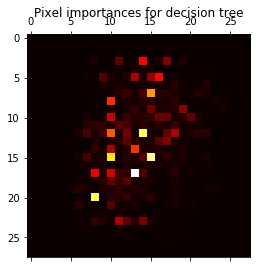

In [49]:
# Plot pixel importances
plt.matshow(importances, cmap=plt.cm.hot)
plt.title("Pixel importances for decision tree")
plt.show()

In [51]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, train_predictors, train_result.tolist(), cv=2)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() / 2))

[0.84717685 0.84878488]
Accuracy: 0.85 (+/- 0.00)


In [52]:
scores = cross_val_score(clf, test_predictors, test_result.tolist(), cv=2)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() / 2))

[0.67986403 0.757503  ]
Accuracy: 0.72 (+/- 0.02)


### We see decision tree performs more poorly than previous two methods. 

# Random Forest 

In [59]:
from sklearn.preprocessing import StandardScaler
train_predictors = StandardScaler().fit_transform(train_predictors)
test_predictors = StandardScaler().fit_transform(test_predictors)

In [60]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [64]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 50, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1,4],
 'min_samples_split': [2,10],
 'n_estimators': [200,800,1400,2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 50, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 4],
 'min_samples_split': [2, 10],
 'n_estimators': [200, 800, 1400, 2000]}

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(train_predictors[0:1000], train_result[0:1000])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

#took around 10 minutes

In [67]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [71]:
from sklearn import model_selection
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(train_predictors,train_result)
# predictions
rfc_predict = rfc.predict(test_predictors)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [72]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_result, rfc_predict))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       980
           1       0.97      0.98      0.98      1135
           2       0.84      0.93      0.88      1032
           3       0.86      0.89      0.87      1010
           4       0.89      0.89      0.89       982
           5       0.82      0.89      0.85       892
           6       0.91      0.92      0.92       958
           7       0.98      0.84      0.91      1027
           8       0.90      0.86      0.88       974
           9       0.95      0.79      0.86      1009

    accuracy                           0.90      9999
   macro avg       0.90      0.90      0.90      9999
weighted avg       0.90      0.90      0.90      9999



In [74]:
rfc_params = RandomForestClassifier(n_estimators=800, max_depth=100, max_features='sqrt',min_samples_split=5,min_samples_leaf=1,bootstrap=False)
rfc_params.fit(train_predictors,train_result)
rfc_params_predict = rfc_params.predict(test_predictors)

In [75]:
print(classification_report(test_result, rfc_params_predict))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.99      0.98      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.97      0.97      0.97       982
           5       0.93      0.97      0.95       892
           6       0.98      0.96      0.97       958
           7       0.98      0.92      0.95      1027
           8       0.93      0.97      0.95       974
           9       0.97      0.93      0.95      1009

    accuracy                           0.96      9999
   macro avg       0.96      0.96      0.96      9999
weighted avg       0.96      0.96      0.96      9999



# Using random search validation, we get a much higher accuracy! 

In [76]:
import pickle
#model = LogisticRegression()
#model.fit(X_train, Y_train)
# save the model to disk
filename = '/Users/matthewvitha/Downloads/apanps5335_ranforclass_model.sav'
pickle.dump(rfc_params, open(filename, 'wb'))

# Save model for future use

In [77]:
loaded_model = pickle.load(open('/Users/matthewvitha/Downloads/apanps5335_ranforclass_model.sav', 'rb'))
result = loaded_model.score(test_predictors, test_result)
print(result)

0.9626962696269626
